# KNN model

In [1]:
import pandas as pd

# Read the CSV file into a pandas dataframe
df = pd.read_csv('cleaned_filename.csv')

In [2]:
# defining X,y dataframe
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# scaling
from sklearn.preprocessing import StandardScaler
# Scale the data using StandardScaler --> then easy to find best K-factor when the data is scaled to have a standard range
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# Fit a k-NN classifier on the training set using the best k-factor from cross validation - 11
knn2 = KNeighborsClassifier(n_neighbors=11, weights='distance', metric='manhattan')
knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=2)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2)

# ROC curve

## KNN

In [11]:
# predict probabilities on test set
y_pred_prob1 = knn2.predict_proba(X_test)[:, 1]

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC
knn2_fpr, knn2_tpr, thresholds = roc_curve(y_test, y_pred_prob1)
knn2_roc_auc = auc(knn2_fpr, knn2_tpr)

## Decision Tree

In [13]:
# predict probabilities on test set
y_pred_prob2 = model2.predict_proba(X_test)[:, 1]

In [14]:
# Calculate ROC curve and AUC
model2_fpr, model2_tpr, thresholds = roc_curve(y_test, y_pred_prob2)
model2_roc_auc = auc(model2_fpr, model2_tpr)

## ROC curve for both model

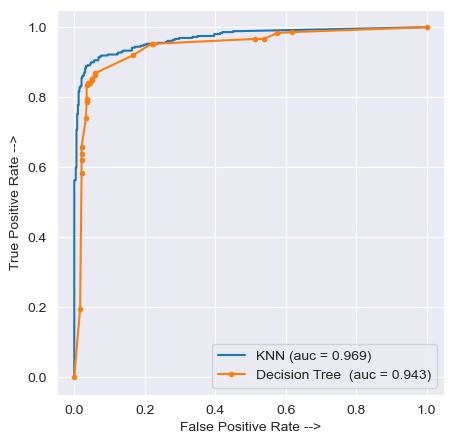

In [15]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(knn2_fpr, knn2_tpr, linestyle='-', label='KNN (auc = %0.3f)' % knn2_roc_auc)
plt.plot(model2_fpr, model2_tpr, marker='.', label='Decision Tree  (auc = %0.3f)' % model2_roc_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()